In [55]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.species_distributions import construct_grids
from sklearn.datasets import fetch_species_distributions
from sklearn.cluster import KMeans
from matplotlib import style
from mpl_toolkits.basemap import Basemap
import plotly.plotly as py



In [56]:
dt = pd.read_csv("globalterrorismd.csv", encoding ='latin1')
dt.head()

C:\Users\Faculdade\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [57]:
dt.region_txt.value_counts()

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

In [58]:
dt = dt.loc[:, ['iyear','imonth','iday','country','gname',
'country_txt',
'region_txt',
'region',
'city',
'latitude',
'longitude',
'success',
'attacktype1',
'attacktype1_txt',
'targtype1',
'targtype1_txt',
'targsubtype1',
'targsubtype1_txt',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'nkill',
 'nwound',]]
dt= dt[(dt.region_txt=="Eastern Europe")|(dt.region_txt=="Western Europe")]
dt.nkill = dt.nkill.fillna(0)
dt.nwound = dt.nwound.fillna(0)

In [59]:
dt.head()

,iyear,imonth,iday,country,gname,country_txt,region_txt,region,city,latitude,...,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,nkill,nwound
3,1970,1,0,78,Unknown,Greece,Western Europe,8,Athens,37.983773,...,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,0.0,0.0
12,1970,1,8,98,Unknown,Italy,Western Europe,8,Rome,41.890520,...,5,Firearms,4.0,Rifle/Shotgun (non-automatic),5.0,Firearms,3.0,Handgun,0.0,0.0
15,1970,1,10,499,Commune 1,East Germany (GDR),Eastern Europe,9,East Berlin,52.516667,...,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,0.0,0.0
34,1970,1,28,499,Unknown,East Germany (GDR),Eastern Europe,9,East Berlin,52.516667,...,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,NaN,NaN,NaN,NaN,0.0,0.0
59,1970,2,10,362,Popular Front for the Liberation of Palestine ...,West Germany (FRG),Western Europe,8,Munich,48.139126,...,5,Firearms,2.0,Automatic Weapon,NaN,NaN,NaN,NaN,1.0,0.0


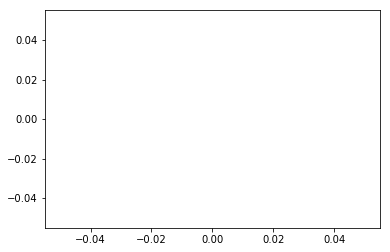

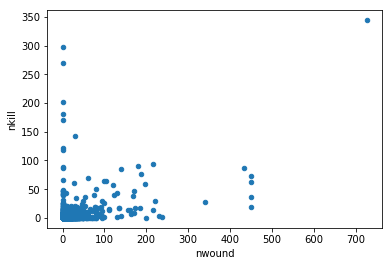

In [60]:
dt.plot.scatter('nwound','nkill')
plt.show()

Ajuste linear entre nwound nkill:
Coeficiente linear: 0.368347295741
Coeficiente angular: 0.20445710143


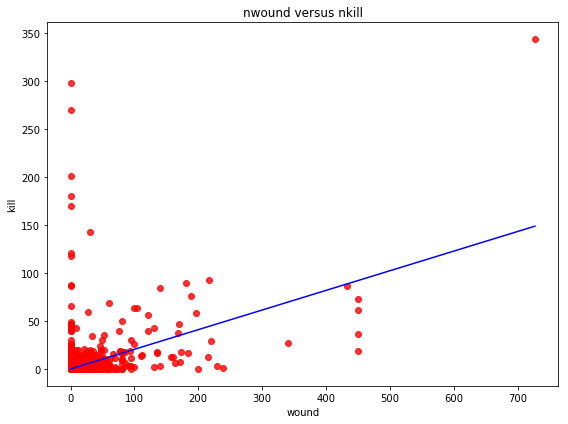

0.454097734617


In [61]:

a = dt.nwound.cov(dt.nkill) / dt.nwound.var()
b = dt.nkill.mean() - a*dt.nwound.mean()

print('Ajuste linear entre nwound nkill:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

fig = plt.figure(figsize=(8, 6))
plt.scatter(dt.nwound, dt.nkill, c='red', alpha=0.8)
plt.title('nwound versus nkill')
plt.xlabel('wound')
plt.ylabel('kill')

plt.plot((dt.nwound.min(), dt.nwound.max()), (a*dt.nwound.min()+b, a*dt.nwound.max()+b), color='blue')
#axes = plt.gca()
#axes.set_xlim([0,200])
#axes.set_ylim([0,200])
plt.tight_layout()
plt.show()
print(dt.nwound.corr(dt.nkill))

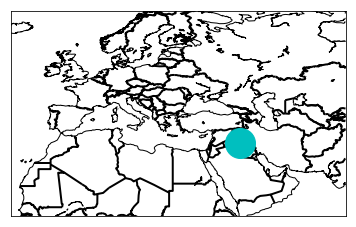

In [62]:
m = Basemap(projection="cyl",
           llcrnrlat=13.00,
           llcrnrlon=-19.66,
           urcrnrlat=69.71,
           urcrnrlon = 72.61,
           resolution='l')
#Coordenadas em latitude e longitude
coordenadas = {
    "IRAQUE" : [33.3,43.35],
    "Portugal": [38.4,9.8],
    "Espanha" : [41.23,2.9],
    "Franca" : [48.51,2.20],
    "Italia" : [43.76,11.25]
}
IRAQlat,IRAQlon = 33.3,43.55
xpt,ypt = m(IRAQlon,IRAQlat)
m.plot(xpt,ypt,'co',markersize=30)
m.drawcoastlines()
m.drawcountries(linewidth=2)
plt.show()

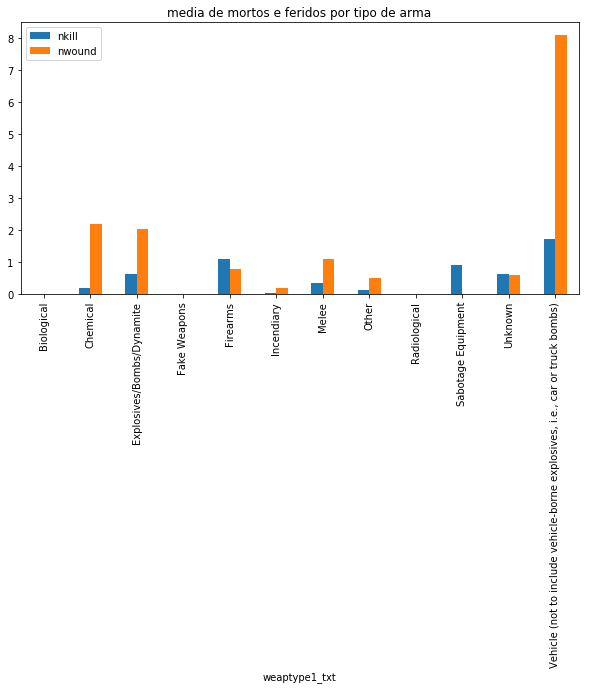

In [63]:

dt_weap = dt.loc[:,['weaptype1_txt','nkill','nwound']]
dt_weap.nkill.groupby(dt.weaptype1_txt).mean()
dt_weap2 = pd.DataFrame(dt_weap.groupby(dt.weaptype1_txt).mean())
dt_weap2.plot(kind = 'bar', figsize = (10,5))
plt.title("media de mortos e feridos por tipo de arma")
plt.show()


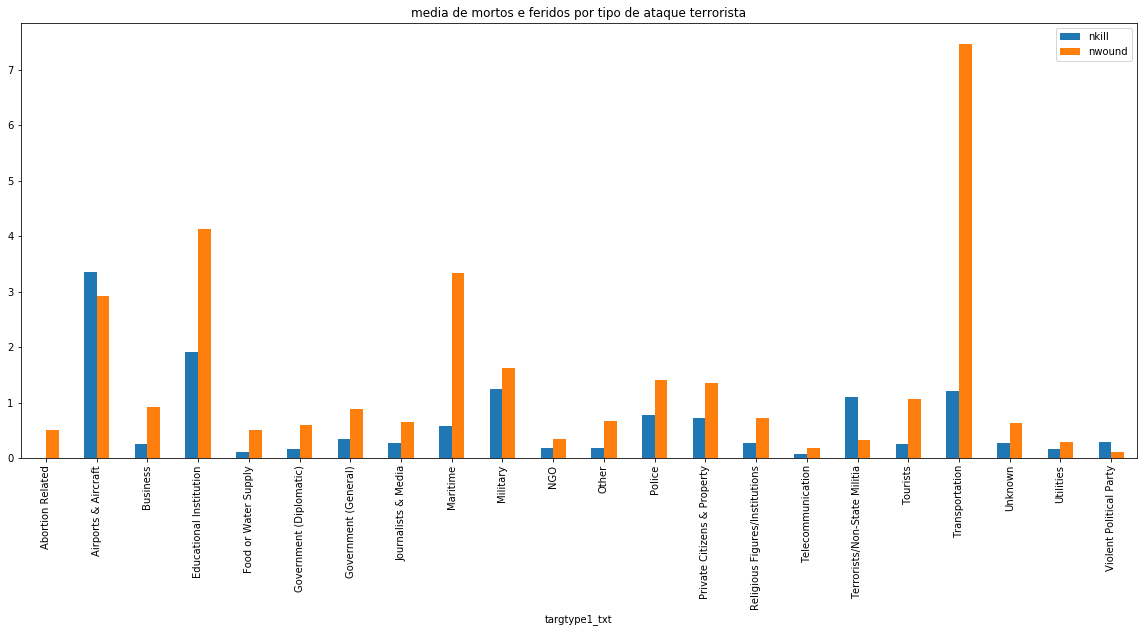

In [64]:
dt_target = dt.loc[:,['targtype1_txt','nkill','nwound']]
dt_target2 = pd.DataFrame(dt_target.groupby(dt.targtype1_txt).mean())
dt_target2.plot(kind = 'bar', figsize= (20,8))
plt.title("media de mortos e feridos por tipo de ataque terrorista")
plt.show()


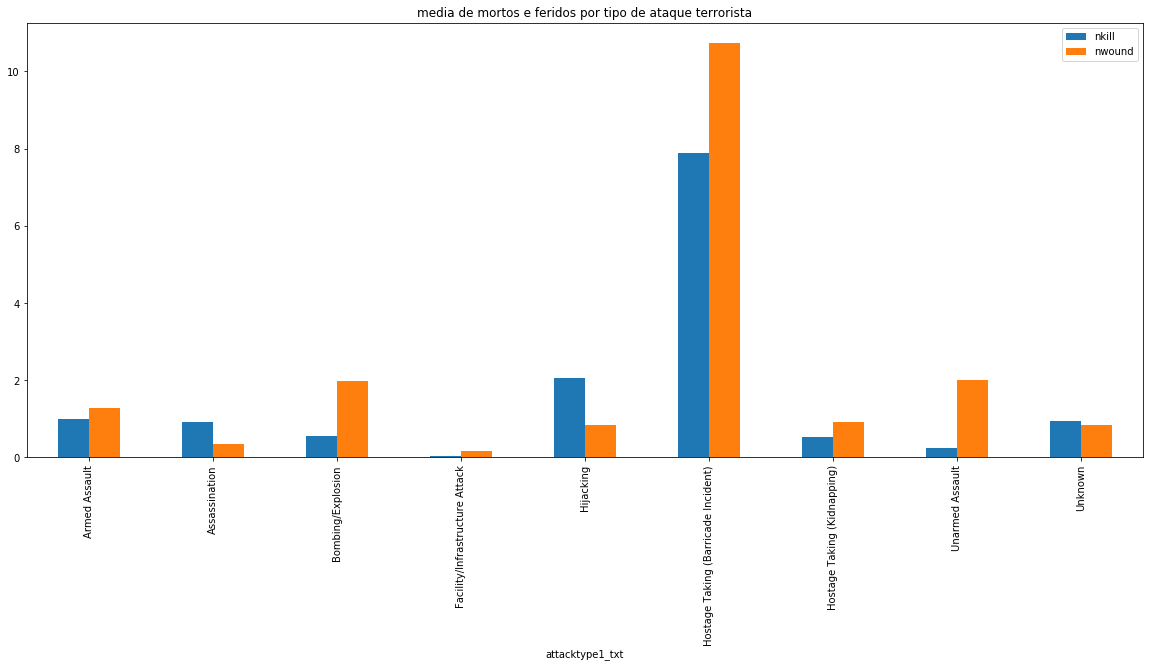

In [65]:
dt_attack = dt.loc[:,['attacktype1_txt','nkill','nwound']]
dt_attack2 = pd.DataFrame(dt_attack.groupby(dt.attacktype1_txt).mean())
dt_attack2.plot(kind = 'bar', figsize= (20,8))
plt.title("media de mortos e feridos por tipo de ataque terrorista")
plt.show()


In [66]:
x = []
y = []

plt.scatter(x,y)


X = np.array([])
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","c.","y."]


for i in range(len(X)):
    print("coordinate:",X[i],"label:",labels[i])
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize = 10)
    
plt.scatter(centrois[:,0],centroids[:,1],marker = "x",s = 150, linewidths = 5,zorder = 10)
plt.show()
    
    
    

C:\Users\Faculdade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

In [ ]:
ataques = []
for i in dt.attacktype1_txt:
    if i not in ataques:
        ataques.append(i)

paises = []
for i in dt.country_txt:
    if i not in paises:
        paises.append(i)


In [ ]:
def bayes_attack(x,y):
        dt_novo = dt[dt.attacktype1_txt == y]
        total = len(dt_novo)
        P = len(dt_novo[dt_novo.country_txt == x])/total
        return P

In [ ]:
dict_p ={}
for i in ataques:
    dict_p[i] = {}
    for k in paises:
        ind = 'P({0}|{1})'.format(k,i)
        P = bayes_attack(k,i)
        #print('P({0}|{1}) = {2}'.format(k,i,P)
        dict_p[i][k] = bayes_attack(k,i)
dict_p


In [ ]:
colo_colum = pd.DataFrame(dict_p)
colo_colum= colo_colum.head()
colo_colum['CODE'] = ['AFG','BEL','BIH','BLR','ARG']
colo_colum

In [67]:
data = [ dict(
        type = 'choropleth',
        locations=colo_colum['CODE'],
        z = colo_colum['Armed Assault'],# retorna a tabela de cores menor valor--> branco, maior valor----> azul
        text = dt['country_txt'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'P(Pais|Tipo de Ataque)'),
      ) ]

layout = dict(
    title = 'Armed Assault',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

TypeError: 'dict' object is not callable

In [ ]:
data = [ dict(
        type = 'choropleth',
        locations=colo_colum['CODE'],
        z = colo_colum['Armed Assault'],# retorna a tabela de cores menor valor--> branco, maior valor----> azul
        text = dt['country_txt'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ),),
        colorbar = dict(
            autotick = False,
            tickprefix = '%',
            title = 'P(Pais|Tipo de Ataque)'),
      ) ]

In [ ]:
data = dict(
    type = 'choropleth',
    locations=colo_colum['CODE'],
    z = colo_colum['Armed Assault'],
    text = dt['country_txt'],
    autocolorscale = True,
    reversescale = True)
data